In [1]:
import clayton
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
plt.style.use('qb-light.mplstyle')
# C5C5C5, 6F6F6F

# Archimedean copulae

We recall here that an **Archimedean** copula can be expressed using it's generator function $\phi$ such that

\begin{equation}
  C(\textbf{u}) = \phi^{\leftarrow}\left( \phi(u_1) + \dots + \phi(u_d) \right),
\end{equation}

where $\textbf{u} \in [0,1]^d$. The generator $\phi(t)$ is a continuous, decreasing and convex function of $t$, with $\phi(0) = 1$.

## Random number generation from Archimedean Copula

### Clayton copula

We propose to simulate a bivariate Clayton copula which can be defined as

\begin{equation}
  C(u,v) = \max \left( u^{-\theta} + v^{-\theta} -1, 0 \right),
\end{equation}

where $\theta \in [-1, \infty) \setminus \{0\}$.

For this copula, we need to initialize it and use the method sample_unimargin() for random generation.

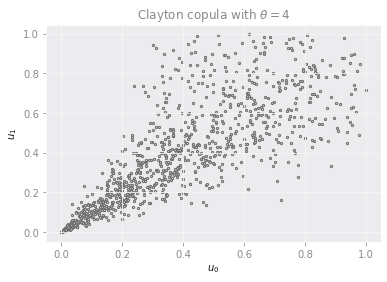

In [2]:
from clayton.rng.archimedean import Clayton
cla = Clayton(theta=4.0, n_sample=1000)
sample = cla.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(r'Clayton copula with $\theta = 4$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
plt.show()

We know sample from a Clayton copula where the parameter is negative, take $\theta = -0.5$.

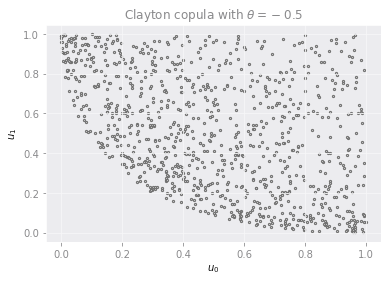

In [3]:
from clayton.rng.archimedean import Clayton
cla = Clayton(theta=-0.5, n_sample=1000)
sample = cla.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(r'Clayton copula with $\theta = -0.5$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
plt.show()

Now, as the module allows it, we simulate a trivariate copula given by
\begin{equation}
  C(u,v,w) = \max \left( u^{-\theta} + v^{-\theta} + w^{-\theta} -1, 0 \right),
\end{equation}
where $\theta \in [-1/(d-1),\infty) \setminus \{0\}$. However, tools to simulate in the specific case $\theta < 0$ are lacking. Thus we are only able to sample from a Clayton copula when the coefficient is strictly positive.

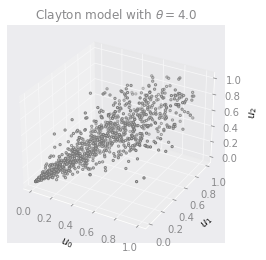

In [4]:
cla = Clayton(theta=4.0, n_sample=1000, dim=3)
sample = cla.sample_unimargin()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2],
             s=5.0, edgecolor='#6F6F6F', color='#C5C5C5')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Clayton model with $\theta = 4.0$')
plt.show()

### Joe copula

Now, we propose to simulate the Joe Copula which are defined with the generator function

\begin{equation}
  \phi(t) = - log\left( 1-(1-t)^\theta\right), \quad 0<t<1,
\end{equation}

with $\theta \in [1, \infty)$.

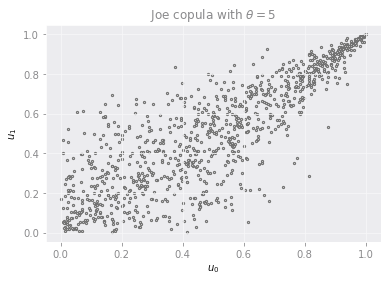

In [5]:
from clayton.rng.archimedean import Joe
joe = Joe(theta=5.0, n_sample=1000)
sample = joe.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(r'Joe copula with $\theta = 5$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
plt.show()

We are also able to sample from a multivariate copula. We restrict here to dimension $d=3$ for obvious representation considerations but we can easily go beyond.

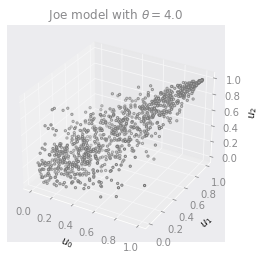

In [6]:
joe = Joe(theta=4.0, n_sample=1000, dim=3)
sample = joe.sample_unimargin()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2],
             s=5.0, edgecolor='#6F6F6F', color='#C5C5C5')
ax.set_title(r'Joe model with $\theta = 4.0$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
plt.show()

### Frank copula

We generate numbers from the Frank copula where the generator is given by

\begin{equation}
  \phi(t) = -\ln\left(\frac{\exp(-\theta t) - 1}{\exp(-\theta)-1}\right), \quad 0 < t < 1,
\end{equation}

with $\theta \in \mathbb{R} \setminus \{0\}$. We first sample with a negative $\theta$ and a positive one afterwards.

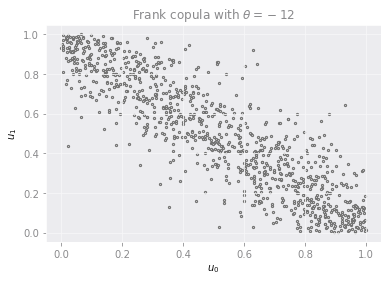

In [7]:
from clayton.rng.archimedean import Frank
frank = Frank(theta=-12.0, n_sample=1000)
sample = frank.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(r'Frank copula with $\theta = -12$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
plt.show()

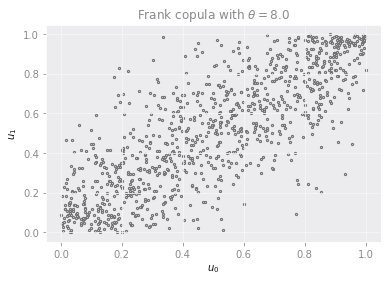

In [8]:
from clayton.rng.archimedean import Frank
frank = Frank(theta=8.0, n_sample=1000)
sample = frank.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(r'Frank copula with $\theta = 8.0$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
plt.show()

Let's head on to the multivariate setting!

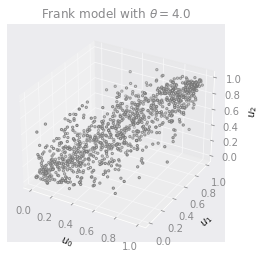

In [9]:
frank = Frank(theta=8.0, n_sample=1000, dim=3)
sample = frank.sample_unimargin()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2],
             s=5.0, edgecolor='#6F6F6F', color='#C5C5C5')
ax.set_title(r'Frank model with $\theta = 4.0$')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
plt.show()

# Extreme value copulae

Extreme value copulae or, more generally, extremal dependencies exhibit suitable form, that is if $\textbf{X}$ is an extreme value distribution, then its joint cumulative distribution function is written as

\begin{equation}
    \mathbb{P}\{\textbf{X} \leq \textbf{x}\} = \exp \left\{ - \Lambda(E \setminus [0,\textbf{x}])\right\},
\end{equation}
where $\Lambda$ is a Radon measure under the cone $E = [0,\infty)^d \setminus \{ \textbf{0} \}$.

In terms of copula, this distribution can be rewritten with the following expression

\begin{equation}
    C(u_1,\dots,u_d) = \exp \left( - \ell (-\ln(u_1),\dots,-\ln(u_d)) \right),
\end{equation}

where $\ell$ is known as the stable tail dependence function.

## Random number generation from extreme value copulae

Notice that, with extreme value copulae, the dependence function can be asymmetric. 

### Asymmetric logistic copula 

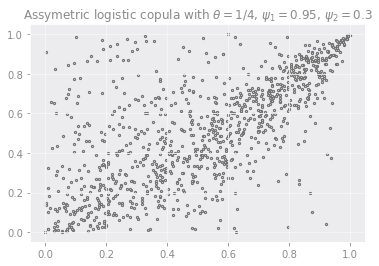

In [10]:
from clayton.rng.evd import AsymmetricLogistic
theta, asy = 1/4.0, [0.05, 0.3, [0.95, 0.7]]
n_sample = 1000

asylog = AsymmetricLogistic(theta=theta, n_sample=n_sample, asy=asy)
sample = asylog.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(
    r'Assymetric logistic copula with $\theta = 1/4$, $\psi_1 = 0.95$, $\psi_2 = 0.3$')
plt.show()


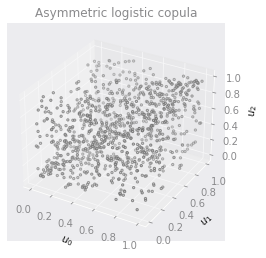

In [11]:
asy = [0.4,0.1,0.6,[0.3,0.2], [0.1,0.1], [0.4,0.1], [0.2,0.3,0.2]]
theta = 0.5
asylog= AsymmetricLogistic(theta=theta, asy=asy, n_sample=1000, dim=3)
sample= asylog.sample_unimargin()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2],
             s=5.0, edgecolor='#6F6F6F', color='#C5C5C5')
ax.set_title(r'Asymmetric logistic copula')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
plt.show()

### Husler Reiss copula

This is a well known distribution and sometimes nicknamed as the "Gaussian for extremes". This stems down that this is the limiting distribution where we take the maxima of properly normalized Gaussian random vector.

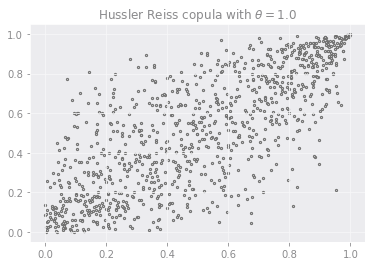

In [12]:
from clayton.rng.evd import HuslerReiss

sigmat = np.array([[0.0,1.0],[1.0,0.0]])
n_sample = 1000

hre = HuslerReiss(sigmat=sigmat, n_sample = n_sample, dim=2)
sample = hre.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = '#6F6F6F', color = '#C5C5C5', s = 5)
ax.set_title(r'Hussler Reiss copula with $\theta = 1.0$')
plt.show()

Let's head on to the multivariate case!

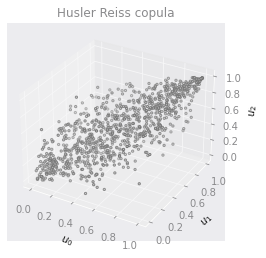

In [13]:
sigmat = np.array([[0.0,1.0,1.0],[1.0,0.0,1.0],[1.0,1.0,0.0]])
n_sample = 1000

hre = HuslerReiss(sigmat=sigmat, n_sample = n_sample, dim=3)
sample = hre.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2],
             s=5.0, edgecolor='#6F6F6F', color='#C5C5C5')
ax.set_title(r'Husler Reiss copula')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
plt.show()

### t-EV copula

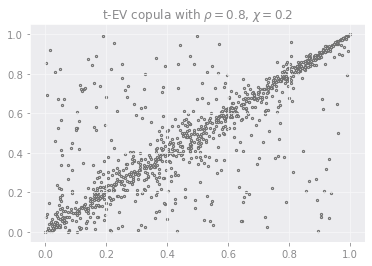

In [14]:
from clayton.rng.evd import TEV
sigmat, psi1 = np.array([[1.0, 0.8], [0.8, 1.0]]), 0.2
n_sample = 1000

tev = TEV(sigmat=sigmat, n_sample=n_sample, psi1=psi1)
sample = tev.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1],
           edgecolor='#6F6F6F', color='#C5C5C5', s=5)
ax.set_title(r't-EV copula with $\rho = 0.8$, $\chi = 0.2$')
plt.show()


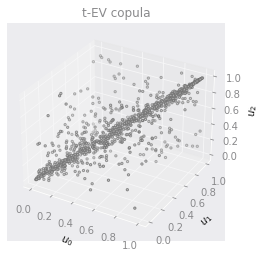

In [15]:
sigmat, psi1 = np.array([[1.0, 0.8, 0.8], [0.8, 1.0, 0.8], [
                        0.8, 0.8, 1.0]]), 0.2  # theta = rho, psi1 = chi
n_sample = 1000

tev = TEV(sigmat=sigmat, n_sample=n_sample, psi1=psi1, dim=3)
sample = tev.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2],
             s=5.0, edgecolor='#6F6F6F', color='#C5C5C5')
ax.set_title(r't-EV copula')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
plt.show()
